In [58]:
import pandas as pd

# Importar o dataset
df_mes_inicial = pd.read_csv("../../../../../data/interim/preprocessing/04_dataset_expo_rn_NO_OUTLIERS_featured_encoded.csv")
df_mes_outubro = pd.read_csv("../../../../../data/interim/preprocessing/04_dataset_expo_rn_outubro_featured_encoded.csv")
df_mes_outubro.head()

,Países,Bloco Econômico,Via,URF,Código NCM,Descrição NCM,Código SH6,Descrição SH6,Código SH4,Descrição SH4,...,Descrição Seção,Unidade estatística,Valor US$ FOB,Quilograma Líquido,Quantidade Estatística,Data,Valor US$ FOB_mensal,Quilograma Líquido_mensal,Valor US$ FOB_anual,Quilograma Líquido_anual
0,0,3,0,2,19,20,80720,20,10,17,...,12,4,12788,9801,9801,2024-10-01,1524439,1324675,1524439,1324675
1,0,3,0,2,45,60,520922,51,30,35,...,3,4,215,96,96,2024-10-01,811265,145440,811265,145440
2,0,3,0,4,19,20,80720,20,10,17,...,12,4,43394,33958,33958,2024-10-01,1524439,1324675,1524439,1324675
3,0,3,0,10,19,20,80720,20,10,17,...,12,4,1800,1800,1800,2024-10-01,1524439,1324675,1524439,1324675
4,0,3,0,13,19,20,80720,20,10,17,...,12,4,42259,31124,31124,2024-10-01,1524439,1324675,1524439,1324675


In [59]:
df_mes_inicial.dtypes

Bloco Econômico               int64
Países                        int64
Via                           int64
URF                           int64
Código NCM                    int64
Descrição NCM                 int64
Código SH6                    int64
Descrição SH6                 int64
Código SH4                    int64
Descrição SH4                 int64
Código SH2                    int64
Descrição SH2                 int64
Código Seção                  int64
Descrição Seção               int64
Unidade estatística           int64
Valor US$ FOB                 int64
Quilograma Líquido            int64
Quantidade Estatística        int64
Data                         object
Valor US$ FOB_mensal          int64
Quilograma Líquido_mensal     int64
Valor US$ FOB_anual           int64
Quilograma Líquido_anual      int64
dtype: object

In [83]:
# Exemplo de pipeline
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin
import pandas as pd

# Criar uma classe customizada para condensar os dados
class CondensaValorFOB(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        # Aqui não precisamos de ajuste, apenas transformação
        return self

    def transform(self, X):
        # A função transform recebe os dados e os transforma
        # Primeiro, certifique-se de que 'Data' está no formato datetime
        X['Data'] = pd.to_datetime(X['Data'], errors='coerce')  # Força conversão para datetime

        # Condensar por mês
        #X['Data'] = X['Data'].dt.to_period('M')
        df_mes = X.groupby(['Data', 'Código SH6'])['Valor US$ FOB'].sum().reset_index()
        df_mes.rename(columns={'Valor US$ FOB': 'Valor US$ FOB Mensal'}, inplace=True)

        # Condensar por ano
        X['Ano'] = X['Data'].dt.year
        df_ano = X.groupby(['Ano', 'Código SH6'])['Valor US$ FOB'].sum().reset_index()
        df_ano.rename(columns={'Valor US$ FOB': 'Valor US$ FOB Anual'}, inplace=True)

        # Combinar os dataframes condensados com os dados originais
        # Realizar o merge para garantir que as colunas sejam mantidas
        df_mes = pd.merge(X[['Código SH6', 'Data', 'Código SH4', 'Via', 'URF', 'Código NCM']], df_mes, on=['Código SH6', 'Data'], how='left')
        df_ano = pd.merge(X[['Código SH6', 'Ano']], df_ano, on=['Código SH6', 'Ano'], how='left')

        return df_mes, df_ano


# Criar o pipeline de pré-processamento
pipeline = Pipeline([
    ('condensacao_fob', CondensaValorFOB())  # Etapa de condensação dos valores FOB
])


In [84]:

# Exemplo de dataset
df_fob_mensal_condesado, df_fob_anual_condesado = pipeline.fit_transform(df_mes_inicial)
df_outubro_mensal_condesado, df_outubro_anual_condesado = pipeline.fit_transform(df_mes_outubro)

In [89]:
df_fob_mensal_condesado.dtypes

Código SH6                       int64
Data                    datetime64[ns]
Código SH4                       int64
Via                              int64
URF                              int64
Código NCM                       int64
Valor US$ FOB Mensal             int64
dtype: object

In [88]:
df_fob_mensal_condesado.to_csv("./df_fob_mensal_condesado.csv", index=False)

# Pré-processamento de dados

In [43]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import joblib
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# Criação do MinMaxScaler
scaler = MinMaxScaler()
# Criação do StandardScaler
#scaler = StandardScaler()

# Normalizar a coluna 'Valor US$ FOB Mensal' no dataframe df_mes_encoded


# Criação do LabelEncoder
encoder = LabelEncoder()
encoder_outubro = LabelEncoder()

# Aplicar LabelEncoder nas colunas selecionadas, sobrescrevendo as colunas originais
df_mes_encoded = df_fob_mensal_condesado.copy()
df_mes_encoded['Data'] = encoder.fit_transform(df_fob_mensal_condesado['Data'])
df_mes_encoded['Código SH6'] = encoder.fit_transform(df_fob_mensal_condesado['Código SH6'])
#df_mes_encoded['Data'] = scaler.fit_transform(df_fob_mensal_condesado[['Data']])
#df_mes_encoded['Código SH6'] = scaler.fit_transform(df_fob_mensal_condesado[['Código SH6']])
#df_mes_encoded['Valor US$ FOB Mensal'] = scaler.fit_transform(df_fob_mensal_condesado[['Valor US$ FOB Mensal']])



df_mes_outubro_encoded = df_outubro_mensal_condesado.copy()
df_mes_outubro_encoded['Data'] = encoder_outubro.fit_transform(df_outubro_mensal_condesado['Data'])
df_mes_outubro_encoded['Código SH6'] = encoder_outubro.fit_transform(df_outubro_mensal_condesado['Código SH6'])
#df_mes_outubro_encoded['Data'] = scaler.fit_transform(df_outubro_mensal_condesado[['Data']])
#df_mes_outubro_encoded['Código SH6'] = scaler.fit_transform(df_outubro_mensal_condesado[['Código SH6']])
#df_mes_outubro_encoded['Valor US$ FOB Mensal'] = scaler.fit_transform(df_outubro_mensal_condesado[['Valor US$ FOB Mensal']])


# Visualizar o resultado
df_mes_encoded

,Código SH6,Data,Valor US$ FOB Mensal
0,155,332,136
1,461,324,5
2,1294,324,5
3,625,324,5
4,627,324,5
...,...,...,...
46267,202,3,137750
46268,86,9,11666
46269,125,3,57936
46270,125,6,107873


In [8]:
df_mes_outubro_encoded

,Código SH6,Data,Valor US$ FOB Mensal
0,17,0,1524439
1,40,0,811265
2,17,0,1524439
3,17,0,1524439
4,17,0,1524439
...,...,...,...
221,16,0,17343784
222,40,0,811265
223,15,0,8220351
224,40,0,811265


# Removendo valores da coluna a ser prevista

In [9]:
import numpy as np

# DataFrame original (mantém os valores)
df_outubro_com_valores = df_outubro_mensal_condesado.copy()

# DataFrame com a coluna preenchida com NaN
df_outubro_sem_valores = df_outubro_mensal_condesado.copy()
df_outubro_sem_valores['Valor US$ FOB Mensal'] = np.nan


In [10]:
df_outubro_com_valores

,Código SH6,Data,Valor US$ FOB Mensal
0,80720,2024-10,1524439
1,520922,2024-10,811265
2,80720,2024-10,1524439
3,80720,2024-10,1524439
4,80720,2024-10,1524439
...,...,...,...
221,80719,2024-10,17343784
222,520922,2024-10,811265
223,80711,2024-10,8220351
224,520922,2024-10,811265


In [12]:
df_outubro_sem_valores.dtypes

Código SH6                  int64
Data                    period[M]
Valor US$ FOB Mensal      float64
dtype: object

# Track MLFlow

In [86]:
import mlflow
mlflow.set_tracking_uri("http://localhost:8080")

# SARIMAX

C:\Users\joao1\DataspellProjects\analise_exportacoes_rn\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\joao1\DataspellProjects\analise_exportacoes_rn\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\joao1\DataspellProjects\analise_exportacoes_rn\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\joao1\DataspellProjects\analise_exportacoes_rn\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported

Métricas de Avaliação:
MAE: 107935.11
RMSE: 163874.53


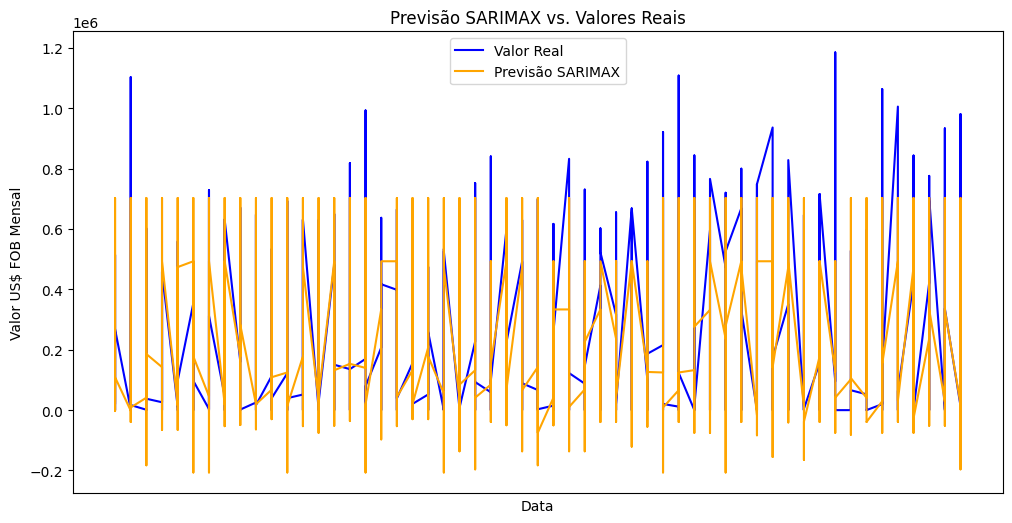

In [45]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt

# Garantir que a coluna "Data" esteja no formato datetime
df_mes_encoded['Data'] = pd.to_datetime(df_mes_encoded['Data'])

# Ordenar o dataset por data, caso não esteja
df = df_mes_encoded.sort_values(by='Data')

# Reduzir o tamanho do dataset para testes rápidos (por exemplo, 10% do total)
#df = df.sample(frac=0.3, random_state=42)  # Usando 10% do dataset original

# Definir a proporção do dataset para teste (ex.: 80% treino, 20% teste)
train_size = int(len(df) * 0.8)

# Divisão em treino e teste
df_train = df.iloc[:train_size]
df_test = df.iloc[train_size:]

# Separar variáveis independentes (X) e dependente (y)
X_train = df_train[['Data', 'Código SH6']]
y_train = df_train['Valor US$ FOB Mensal']

X_test = df_test[['Data', 'Código SH6']]
y_test = df_test['Valor US$ FOB Mensal']

# Garantir que o índice seja a Data para séries temporais
df_train.set_index('Data', inplace=True)
df_test.set_index('Data', inplace=True)

# Codificar a variável categórica "Código SH6"
X_train_encoded = pd.get_dummies(df_train['Código SH6'], drop_first=True).astype(int)
X_test_encoded = pd.get_dummies(df_test['Código SH6'], drop_first=True).astype(int)

# Garantir que as colunas sejam consistentes entre treino e teste
X_test_encoded = X_test_encoded.reindex(columns=X_train_encoded.columns, fill_value=0)

# Reduzir a complexidade do modelo (usar ordens menores para acelerar o treinamento)
model = SARIMAX(
    df_train['Valor US$ FOB Mensal'],  # Série temporal a ser prevista
    exog=X_train_encoded,             # Variáveis exógenas no treino
    order=(0, 1, 0),                  # Menor ordem para acelerar o treinamento (ARIMA)
    seasonal_order=(0, 0, 0, 12)      # Sem sazonalidade para acelerar
)

results = model.fit()

# Fazer previsões no conjunto de teste
forecast = results.forecast(
    steps=len(df_test),
    exog=X_test_encoded  # Variáveis exógenas no teste
)

# Avaliar o modelo
mae = mean_absolute_error(df_test['Valor US$ FOB Mensal'], forecast)
mse = mean_squared_error(df_test['Valor US$ FOB Mensal'], forecast)
rmse = np.sqrt(mse)

print("Métricas de Avaliação:")
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")

# Visualizar resultados
plt.figure(figsize=(12, 6))
plt.plot(df_test.index, df_test['Valor US$ FOB Mensal'], label="Valor Real", color='blue')
plt.plot(df_test.index, forecast, label="Previsão SARIMAX", color='orange')
plt.xlabel("Data")
plt.ylabel("Valor US$ FOB Mensal")
plt.title("Previsão SARIMAX vs. Valores Reais")
plt.legend()
plt.show()


# Treinando Regressão logística

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, classification_report
import mlflow

# Definir o nome do experimento
experiment_name = "Logistic_Regression_Model_Exportacao_FOB"

# Definir o experimento no MLflow
mlflow.set_experiment(experiment_name)

# Separar preditores (X) e resposta (y)
X = df_mes_encoded[['Código SH6', 'Data']]  # Variáveis independentes
y = df_mes_encoded['Valor US$ FOB Mensal']  # Variável dependente

# Dividir o dataset em treinamento (80%) e teste (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Definir o modelo de Regressão Logística
logistic_model = LogisticRegression(random_state=42, max_iter=1000)

# Hiperparâmetros para o GridSearch (ajustando parâmetros típicos da regressão logística)
param_grid_logistic = {
    'C': [0.01, 0.1, 1, 10],         # Parâmetro de regularização
    'penalty': ['l2'],               # Tipo de regularização
    'solver': ['lbfgs', 'liblinear'] # Algoritmos para otimização
}

# Configurar o GridSearchCV
grid_search_logistic = GridSearchCV(
    estimator=logistic_model,
    param_grid=param_grid_logistic,
    cv=5,  # Validação cruzada
    scoring='accuracy',  # Avaliar usando a acurácia
    verbose=2,
    n_jobs=-1
)

# Iniciar o experimento no MLflow
#with mlflow.start_run():
# Treinar o GridSearchCV com Regressão Logística
grid_search_logistic.fit(X_train, y_train)

# Exibir os melhores hiperparâmetros encontrados
print("Melhores Hiperparâmetros para Regressão Logística:", grid_search_logistic.best_params_)

# Logar os parâmetros usados no MLflow
mlflow.log_params(grid_search_logistic.best_params_)

# Obter o melhor modelo
best_logistic_model = grid_search_logistic.best_estimator_

# Realizar previsões no conjunto de teste
y_pred_logistic = best_logistic_model.predict(X_test)

# Avaliar as métricas do modelo (para classificação)
accuracy = accuracy_score(y_test, y_pred_logistic)
class_report = classification_report(y_test, y_pred_logistic)

# Exibir as métricas
print(f"Logistic Regression - Accuracy: {accuracy:.2f}")
print(f"Logistic Regression - Classification Report:\n{class_report}")

# Logar as métricas no MLflow
mlflow.log_metric("accuracy", accuracy)

# Logar o modelo no MLflow
mlflow.sklearn.log_model(best_logistic_model, "logistic_regression_model")


2024/11/27 17:40:41 INFO mlflow.tracking.fluent: Experiment with name 'Logistic_Regression_Model_Exportacao_FOB' does not exist. Creating a new experiment.
C:\Users\joao1\DataspellProjects\analise_exportacoes_rn\.venv\Lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Fitting 5 folds for each of 8 candidates, totalling 40 fits


In [33]:
import numpy as np

# DataFrame original (mantém os valores)
data_outubro_com_valores = data_outubro.copy()

# DataFrame com a coluna preenchida com NaN
data_outubro_sem_valores = data_outubro.copy()
data_outubro_sem_valores['Valor US$ FOB_anual'] = np.nan

# Separar os preditores do DataFrame com valores NaN
x_outubro_sem_valores = data_outubro_sem_valores.drop(columns=["Valor US$ FOB_anual"])

# Garantir que a ordem das colunas é a mesma do treinamento
x_outubro_sem_valores = x_outubro_sem_valores[x_train.columns]

# Aplicar o modelo para prever os valores
previsoes = best_rf_model.predict(x_outubro_sem_valores)

# Inserir as previsões de volta ao DataFrame com NaN
data_outubro_sem_valores["Valor US$ FOB_anual"] = previsoes



TypeError: float() argument must be a string or a real number, not 'Period'

In [34]:
import pandas as pd

# Supondo que 'data_outubro_com_valores' contém os valores reais
# e 'data_outubro_sem_valores' contém as previsões

# Recuperar os valores reais e previstos
valores_reais = data_outubro_com_valores["Valor US$ FOB_anual"]
valores_previstos = data_outubro_sem_valores["Valor US$ FOB_anual"]

# Calcular o erro absoluto
erro_absoluto = abs(valores_reais - valores_previstos)

# Calcular o erro percentual relativo (opcional)
erro_percentual = abs((valores_reais - valores_previstos) / valores_reais) * 100

# Criar um DataFrame para comparação
df_comparacao = pd.DataFrame({
    "Valor Real": valores_reais,
    "Valor Previsto": valores_previstos,
    "Erro Absoluto": erro_absoluto,
    "Erro Percentual (%)": erro_percentual
})

# Exibir o DataFrame
df_comparacao

,Valor Real,Valor Previsto,Erro Absoluto,Erro Percentual (%)
0,1524439,8.759882e+06,7.235443e+06,474.629880
1,811265,1.250939e+06,4.396739e+05,54.196084
2,1524439,8.759882e+06,7.235443e+06,474.629880
3,1524439,8.759882e+06,7.235443e+06,474.629880
4,1524439,8.759882e+06,7.235443e+06,474.629880
...,...,...,...,...
221,17343784,1.327285e+07,4.070938e+06,23.472029
222,811265,1.250939e+06,4.396739e+05,54.196084
223,8220351,1.327285e+07,5.052495e+06,61.463251
224,811265,1.250939e+06,4.396739e+05,54.196084


# Árvore de decisão com novo dataset

In [43]:
import pandas as pd

# Importar o dataset
df_mes = pd.read_csv("../../../../../data/interim/preprocessing/03_dataset_expo_rn_fob_mensal.csv")
df_mes

,Data,Código SH6,Valor US$ FOB Mensal
0,1997-01,30269,3395
1,1997-01,30611,600068
2,1997-01,51199,5220
3,1997-01,80132,1773030
4,1997-01,80300,62229
...,...,...,...
19838,2024-09,820510,2775
19839,2024-09,841221,1401
19840,2024-09,842519,8125
19841,2024-09,854929,134857


In [45]:
from sklearn.preprocessing import LabelEncoder

# Instanciar o LabelEncoder
le = LabelEncoder()

# Codificar as colunas individualmente
df_mes['Código SH6'] = le.fit_transform(df_mes['Código SH6'])
df_mes['Data'] = le.fit_transform(df_mes['Data'])

# Exibir o resultado
df_mes

,Data,Código SH6,Valor US$ FOB Mensal
0,0,16,3395
1,0,63,600068
2,0,86,5220
3,0,109,1773030
4,0,112,62229
...,...,...,...
19838,332,909,2775
19839,332,946,1401
19840,332,993,8125
19841,332,1194,134857


In [52]:
import mlflow
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Separar preditores (X) e resposta (y)
X = df_mes[['Código SH6', 'Data']]  # Variáveis independentes
y = df_mes['Valor US$ FOB Mensal']  # Variável dependente

# Dividir o dataset em treinamento (80%) e teste (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Definir o modelo base
model = DecisionTreeRegressor(random_state=42)

# Configurar os hiperparâmetros para o GridSearch
param_grid = {
    'max_depth': [3, 5, 10, 15, 20, 25],
    'min_samples_split': [2, 5, 10, 15, 20, 25],
    'min_samples_leaf': [1, 2, 4, 6, 8, 10],
    'criterion': ['squared_error', 'friedman_mse']
}

# Configurar o GridSearchCV
grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    cv=5,  # Número de folds para validação cruzada
    scoring='neg_mean_absolute_error',  # Métrica de avaliação (MAE negativo)
    verbose=2,
    n_jobs=-1  # Usar todos os núcleos disponíveis
)

# Iniciar o experimento no MLflow
with mlflow.start_run():

    # Nomear o experimento de acordo com o modelo
    mlflow.set_experiment("Decision_Tree_Regressor_Model_GridSearchCV")

    # Executar o GridSearchCV
    grid_search.fit(X_train, y_train)

    # Exibir os melhores hiperparâmetros
    print("Melhores Hiperparâmetros:", grid_search.best_params_)

    # Treinar o modelo com os melhores hiperparâmetros
    best_model = grid_search.best_estimator_

    # Avaliar no conjunto de teste
    y_pred = best_model.predict(X_test)

    # Avaliação do modelo
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Log das métricas no MLflow
    mlflow.log_metric("mae", mae)
    mlflow.log_metric("mse", mse)
    mlflow.log_metric("r2", r2)

    # (Opcional) Log do modelo
    mlflow.sklearn.log_model(best_model, "decision_tree_regressor_model")

    # Exibir métricas no console
    print(f"MAE (Mean Absolute Error): {mae:.2f}")
    print(f"MSE (Mean Squared Error): {mse:.2f}")
    print(f"R² Score: {r2:.2f}")


2024/11/27 14:34:52 INFO mlflow.tracking.fluent: Experiment with name 'Decision_Tree_Regressor_Model_GridSearchCV' does not exist. Creating a new experiment.


Fitting 5 folds for each of 432 candidates, totalling 2160 fits
Melhores Hiperparâmetros: {'criterion': 'squared_error', 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 5}


2024/11/27 14:35:13 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


MAE (Mean Absolute Error): 352441.91
MSE (Mean Squared Error): 7608813995696.29
R² Score: 0.40
🏃 View run intrigued-fly-327 at: http://localhost:8080/#/experiments/222862534105789614/runs/929c03f74afc448399604d0b15b31503
🧪 View experiment at: http://localhost:8080/#/experiments/222862534105789614
